In [38]:
import pandas, importlib
import matplotlib.pyplot as plt

import countsColumnsNaming
import vennMaker
import peaksList
import heatmap
import utils

rl = importlib.reload
rl(vennMaker)
rl(peaksList)
rl(heatmap)
rl(utils)


<module 'utils' from '/Users/dfporter/Desktop/macbook_air_Desktop/shared/sp_oo/FBF_gendered_gl/cliputil/utils.py'>

In [7]:
li ="""  393784 bed_collapsed/control_oo.bed
   97070 bed_collapsed/control_oo_1.bed
  200654 bed_collapsed/control_oo_2.bed
   96060 bed_collapsed/control_oo_3.bed
  359370 bed_collapsed/control_sp.bed
  128443 bed_collapsed/control_sp_1.bed
   65914 bed_collapsed/control_sp_2.bed
  165013 bed_collapsed/control_sp_3.bed
   13486 bed_collapsed/exp_fbf1_oo_1.bed
  681860 bed_collapsed/exp_fbf1_oo_2.bed
 1698217 bed_collapsed/exp_fbf1_oo_3.bed
  852744 bed_collapsed/exp_fbf1_sp_1.bed
  475910 bed_collapsed/exp_fbf1_sp_2.bed
 1064502 bed_collapsed/exp_fbf1_sp_3.bed
  426458 bed_collapsed/exp_fbf2_oo_1.bed
  186319 bed_collapsed/exp_fbf2_oo_2.bed
  354981 bed_collapsed/exp_fbf2_oo_3.bed
  569792 bed_collapsed/exp_fbf2_sp_1.bed
 1001336 bed_collapsed/exp_fbf2_sp_2.bed
  740220 bed_collapsed/exp_fbf2_sp_3.bed
  439944 bed_collapsed/exp_fbf_oo_1.bed
 1036841 bed_collapsed/exp_fbf_oo_2.bed
 1884536 bed_collapsed/exp_fbf_oo_3.bed
 1477246 bed_collapsed/exp_fbf_sp_1.bed
 1592964 bed_collapsed/exp_fbf_sp_2.bed
 1634294 bed_collapsed/exp_fbf_sp_3.bed"""

for r in li.split('\n'):
    s = r.lstrip(' ').split(' ')
    outli = '"{}_counts.txt": {},'.format(s[1].split('/')[-1].split('.')[0], s[0])
    print(outli)


"control_oo_counts.txt": 393784,
"control_oo_1_counts.txt": 97070,
"control_oo_2_counts.txt": 200654,
"control_oo_3_counts.txt": 96060,
"control_sp_counts.txt": 359370,
"control_sp_1_counts.txt": 128443,
"control_sp_2_counts.txt": 65914,
"control_sp_3_counts.txt": 165013,
"exp_fbf1_oo_1_counts.txt": 13486,
"exp_fbf1_oo_2_counts.txt": 681860,
"exp_fbf1_oo_3_counts.txt": 1698217,
"exp_fbf1_sp_1_counts.txt": 852744,
"exp_fbf1_sp_2_counts.txt": 475910,
"exp_fbf1_sp_3_counts.txt": 1064502,
"exp_fbf2_oo_1_counts.txt": 426458,
"exp_fbf2_oo_2_counts.txt": 186319,
"exp_fbf2_oo_3_counts.txt": 354981,
"exp_fbf2_sp_1_counts.txt": 569792,
"exp_fbf2_sp_2_counts.txt": 1001336,
"exp_fbf2_sp_3_counts.txt": 740220,
"exp_fbf_oo_1_counts.txt": 439944,
"exp_fbf_oo_2_counts.txt": 1036841,
"exp_fbf_oo_3_counts.txt": 1884536,
"exp_fbf_sp_1_counts.txt": 1477246,
"exp_fbf_sp_2_counts.txt": 1592964,
"exp_fbf_sp_3_counts.txt": 1634294,


SP FBF (25°C)
SP FBF-2 (25°C)
SP FBF-1 (25°C)
OO FBF-1 (20°C)
OO FBF-2 (20°C)
OO FBF (25°C)
OO FBF-2 (25°C)
OO FBF-1 (25°C)
---
1958 RNAs were targets in SP or OO germlines.
Among those, 1458 were OO only, 15 were SP only, and 485 were shared.

SP FBF (25°C)
SP FBF-2 (25°C)
SP FBF-1 (25°C)
OO FBF-1 (20°C)
OO FBF-2 (20°C)
OO FBF (25°C)
OO FBF-2 (25°C)
OO FBF-1 (25°C)
---
1817 RNAs were targets in SP or OO germlines.
Among those, 75 were OO only, 1317 were SP only, and 425 were shared.



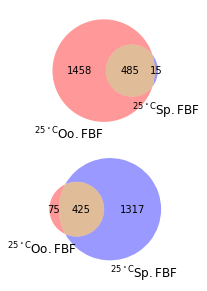

In [69]:
from _label_to_fname import label_to_fname, fname_to_label
rl(vennMaker)

v = vennMaker.vennMaker()
v.load_peaks_from_excel_file()

#v.load_peaks_csv_files(label_to_fname)
plt.rc('font', size=10)
fig, ax = plt.subplots(2)
def top_n(v, list_name):
    v.df[list_name].drop_duplicates(subset='Gene name', keep='first', inplace=True)
    v.df[list_name] = v.df[list_name].head(500).copy()
    v.targs[list_name] = set(v.df[list_name]['Gene name'].tolist())

#v.top_n_ranks(n=500)
top_n(v, 'OO FBF (25°C)')
v.oo_vs_sp(ax[0], b=v.targs['OO FBF (25°C)'], a=v.targs['SP FBF (25°C)'], look_at_biotypes=False)

v = vennMaker.vennMaker()
v.load_peaks_from_excel_file()

top_n(v, 'SP FBF (25°C)')
v.oo_vs_sp(ax[1], b=v.targs['OO FBF (25°C)'], a=v.targs['SP FBF (25°C)'], look_at_biotypes=False)

skip = """
#v.new_oo_vs_old_both_fbfs(ax[0])
#v.top_n_ranks(n=500)
list_name = 'OO FBF (25°C)'
v.df[list_name].drop_duplicates(subset='Gene name', keep='first', inplace=True)
v.df[list_name] = v.df[list_name].head(500).copy()
v.targs[list_name] = set(v.df[list_name]['Gene name'].tolist())

v.new_oo_vs_old_both_fbfs(ax[0])

v = vennMaker.vennMaker()
v.load_peaks_from_excel_file()
list_name = 'OO FBF (20°C, both FBFs)'
v.df[list_name].drop_duplicates(subset='Gene name', keep='first', inplace=True)
v.df[list_name] = v.df[list_name].head(500).copy()
v.targs[list_name] = set(v.df[list_name]['Gene name'].tolist())

v.new_oo_vs_old_both_fbfs(ax[1])"""

plt.tight_layout()
plt.show()
#plt.savefig('Fig S1 venns.pdf')
plt.clf()
plt.close()

In [28]:
print(v.df['SP FBF (25°C)'].iloc[0])


Rank                                                                                                         1
Chrm                                                                                                       III
Nucleotide location left end of peak                                                                  10506104
Nucleotide location right end of peak                                                                 10506370
Gene name                                                                                                sip-1
Peak height (reads/million)                                                                            815.241
Strand                                                                                                       -
Transcript                                                                                             F43D9.4
Biotype                                                                                         protein_coding
H